In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

In [3]:
pizza_df = pd.read_csv('pizza_data.csv').drop('Unnamed: 0', axis = 1)
pizza_df.head()

,id,Neighb,Restaurant,Hour,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,ChIJx8KiHcx9j4AR7KYfgcUQk1g,Mission,Mr. Pizza Man,0.0,0.0,0.0,0.0,0.0,0.0,37.0,62.0
1,ChIJx8KiHcx9j4AR7KYfgcUQk1g,Mission,Mr. Pizza Man,1.0,0.0,0.0,0.0,0.0,0.0,77.0,55.0
2,ChIJx8KiHcx9j4AR7KYfgcUQk1g,Mission,Mr. Pizza Man,2.0,0.0,0.0,0.0,0.0,0.0,25.0,62.0
3,ChIJx8KiHcx9j4AR7KYfgcUQk1g,Mission,Mr. Pizza Man,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ChIJx8KiHcx9j4AR7KYfgcUQk1g,Mission,Mr. Pizza Man,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
district = 'North Beach'
time = 20
day = 'Saturday'

In [5]:
#Create prior distribution
from scipy.stats import gamma
p_theta = np.zeros(101)
#Set probability of 0 to .55 will be normalized to around .36 later
p_theta[0] = .55
std = 20
for i in range(1,101):
    p_theta[i] = gamma.pdf(i, 2,scale = std)    
p_theta = p_theta / p_theta.sum()

In [6]:
#Create likelihood function
#P(neighborhood,time,day | busy) = #(neighborhood, day time that busy) / # times that busyness appears 
def likelihood(district,hour,day,busyness):
    total = len(pizza_df[(pizza_df[day] >= (busyness -2)) & (pizza_df[day] <= (busyness +2))])
    if total == 0:
        total = 1
    with_busy = len(pizza_df[(pizza_df.Hour == hour) & (pizza_df.Neighb == district) & (pizza_df[day] >= (busyness -2)) & (pizza_df[day] <= (busyness +2))])
    return(with_busy/total)

In [7]:
#Calculate the posterior for certain Neighborhood time and day
def calc_post(district,time,day):
    expected = np.zeros(101)
    for i in range(0,101):
        expected[i] = likelihood(district,time,day,i)
    post = (expected*p_theta)/(expected*p_theta).sum()
    return(post)

In [8]:
def find_expected(post):
    ex = 0
    for i in range(0,101):
        ex = ex + i*post[i]
    return(ex)

In [13]:
district = 'North Beach'
time = 20
day = 'Saturday'
sample_post = calc_post(district,time,day)
print("The expected busyness at " + str(time) + " in " + district + " is " + str(find_expected(calc_post(district,time,day))))

The expected busyness at 20 in North Beach is 79.51182854221928


In [55]:
district = input("Input a district.\nMission, North Beach, Richmond, Sunset, Fillmore, Polk, Financial District: ")
day = input("Input a day of the week: ")
time = int(input("Input a time in military time: "))
print("The expected busyness in " + district + " on " + day + " at " + str(time) + " is " + str(find_expected(calc_post(district,time,day))))

Input a district.
Mission, North Beach, Richmond, Sunset, Fillmore, Polk, Financial District: North Beach
Input a day of the week: Saturday
Input a time in military time: 20
The expected busyness in North Beach on Saturday at 20 is 79.51182854221928


Text(0.5, 1.0, 'Distributiuon of Busyness on Saturday nights in North Beach')

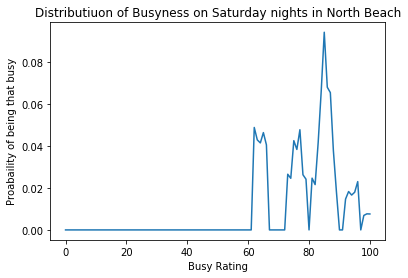

In [14]:
plt.plot(range(0,101),sample_post)
plt.xlabel('Busy Rating')
plt.ylabel('Proabaility of being that busy')
plt.title('Distributiuon of Busyness on Saturday nights in North Beach')

In [15]:
district = 'Financial District'
time = 20
day = 'Saturday'
sample_post1 = calc_post(district,time,day)

Text(0.5, 1.0, 'Distributiuon of Busyness on Saturday nights in the Financial District')

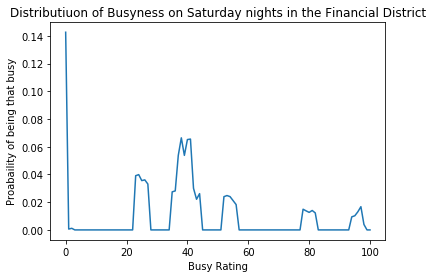

In [16]:
plt.plot(range(0,101),sample_post1)
plt.xlabel('Busy Rating')
plt.ylabel('Proabaility of being that busy')
plt.title('Distributiuon of Busyness on Saturday nights in the Financial District')

C:\Users\x1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """


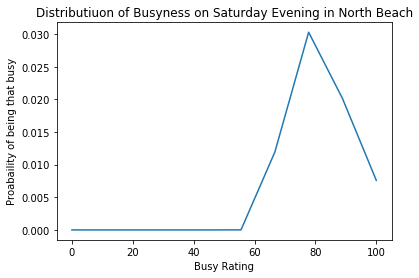

In [19]:
from scipy.interpolate import spline
x = np.linspace(0,100,101)
xnew = np.linspace(0,100,10) #300 represents number of points to make between T.min and T.max

power_smooth = spline(x,sample_post,xnew)

plt.plot(xnew,power_smooth)
plt.xlabel('Busy Rating')
plt.ylabel('Proabaility of being that busy')
plt.title('Distributiuon of Busyness on Saturday Evening in North Beach')
plt.show()

C:\Users\x1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """


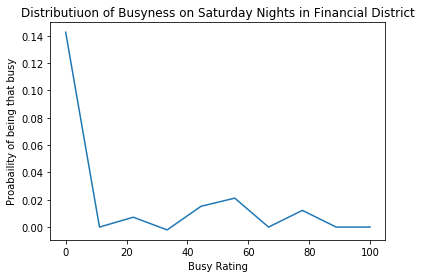

In [20]:
from scipy.interpolate import spline

xnew = np.linspace(0,100,10) #300 represents number of points to make between T.min and T.max

power_smooth = spline(x,sample_post1,xnew)

plt.plot(xnew,power_smooth)
plt.xlabel('Busy Rating')
plt.ylabel('Proabaility of being that busy')
plt.title('Distributiuon of Busyness on Saturday Nights in Financial District')
plt.show()

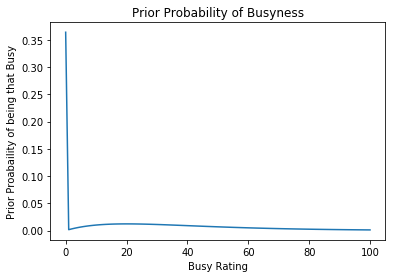

In [54]:
plt.plot(x,p_theta)
plt.xlabel('Busy Rating')
plt.ylabel('Prior Proabaility of being that Busy')
plt.title('Prior Probability of Busyness')
plt.show()